# Classification model using Logistic Regression

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_200_review.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:202 ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,1,0.442789,0.226327,-3.395011,0.761912,-1.181912,-2.057796,1.901030,1.522585,1.423520,...,-0.868301,-0.086499,-1.845631,0.055275,-0.643941,1.154629,0.672262,-1.960425,0.978955,1.969951
1,1,-0.028265,1.410163,-2.657692,0.825858,0.435628,-0.972779,1.769565,1.036833,1.384876,...,-1.698915,-1.105859,-0.437742,0.587427,0.048230,-0.216112,1.084762,-2.144046,1.397851,0.873189
2,1,0.269204,0.884609,-1.665391,1.609233,-0.564921,0.837579,1.007009,-0.886500,0.638139,...,-0.221767,-2.244491,-1.593955,-0.136215,-0.294638,-0.849120,-0.267188,-1.294744,0.276453,-0.562008
3,0,0.239312,0.799451,-2.839295,0.810844,0.533907,-0.948322,1.995090,0.853652,1.670330,...,-1.495095,-1.396998,-0.734805,0.479203,-0.163358,-0.100398,0.647680,-2.374888,1.707838,0.507836
4,1,-0.351865,-1.245096,-0.744767,-1.102401,0.138185,1.691464,0.830067,0.261012,0.593560,...,1.819882,-0.315093,-2.720363,-1.119180,0.080892,-1.040733,0.136569,-1.674414,0.958555,-1.271945


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:202] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.442789  0.226327 -3.395011  0.761912 -1.181912 -2.057796  1.901030   
1   -0.028265  1.410163 -2.657692  0.825858  0.435628 -0.972779  1.769565   
2    0.269204  0.884609 -1.665391  1.609233 -0.564921  0.837579  1.007009   
3    0.239312  0.799451 -2.839295  0.810844  0.533907 -0.948322  1.995090   
4   -0.351865 -1.245096 -0.744767 -1.102401  0.138185  1.691464  0.830067   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.121525  0.789393 -1.679044 -0.338311 -0.033060  0.143954  0.686666   
177 -0.217280  0.614284 -3.202434  1.415873 -0.034867 -1.669631  1.756469   
178 -0.015025  0.468370 -1.550519 -0.117665 -0.567333 -0.207721  0.605682   
179 -0.244144  1.576056 -1.483863  0.089200 -0.107631 -0.831589  0.260183   
180 -0.161056  0.517091 -1.964447  0.106236 -0.606570 -0.446199  0.921929   

            7         8         9  ...       190       191       192  \
0  

### 3. Train-Test dataset split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_train))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 144


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'C': [1,2,5,7,10, 11, 12, 13, 14],
            'max_iter':[1000,50000,1000000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10, 11, 12, 13, 14],
                         'max_iter': [1000, 50000, 1000000],
                         'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=1, max_iter=1000, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5071428571428571


In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0
y_train=y_train.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0
y_test=y_test.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset:0.9097222222222222
Final accuracy on the testing dataset: 0.6486486486486487


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[64  4]
 [ 9 67]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1]


In [12]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        68
           1       0.94      0.88      0.91        76

    accuracy                           0.91       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.91      0.91      0.91       144



In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 9  8]
 [ 5 15]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0]


In [14]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        17
           1       0.65      0.75      0.70        20

    accuracy                           0.65        37
   macro avg       0.65      0.64      0.64        37
weighted avg       0.65      0.65      0.64        37



### 7. Results visualizaton

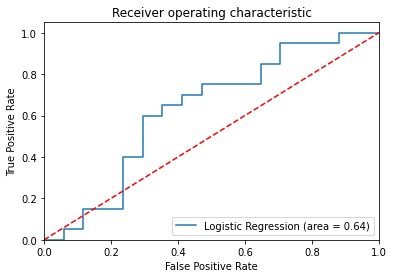

In [15]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()